In [30]:
from netCDF4 import Dataset as nc #import netcdf library
from netCDF4 import num2date, date2num
from datetime import date, timedelta
import numpy as np
fileTmax = nc("tx_ens_mean_0.25deg_reg_v19.0e.nc", "r") # open the netcdf file

In [31]:
fileTmax.variables

OrderedDict([('latitude', <class 'netCDF4._netCDF4.Variable'>
              float64 latitude(latitude)
                  units: degrees_north
                  long_name: Latitude values
                  axis: Y
                  standard_name: latitude
              unlimited dimensions: 
              current shape = (201,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('longitude', <class 'netCDF4._netCDF4.Variable'>
              float64 longitude(longitude)
                  units: degrees_east
                  long_name: Longitude values
                  axis: X
                  standard_name: longitude
              unlimited dimensions: 
              current shape = (464,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('time', <class 'netCDF4._netCDF4.Variable'>
              int32 time(time)
                  units: days since 1950-01-01 00:00
                  long_name: Time in days


In [34]:
tmax = fileTmax.variables.get("tx")[60,:,:] #read the variable
#TmaxBCN=np.array(tmax[:,0,0])
#read time axis
timevar=fileTmax.variables["time"]
dates = num2date(timevar[:], units=timevar.units) 
dates = np.array([date(d.year, d.month, d.day) for d in list(dates)])

#fileTmax.close()

In [37]:
d1 = date(1987,6,1)
d2 = date(1987,9,1)

posver = np.where((dates>d1)&(dates<d2))
posver[0][1],posver[0][-1]

(13667, 13756)

In [38]:
tmax = fileTmax.variables.get("tx")[posver[0][1]:posver[0][-1],:,:] #read the variable


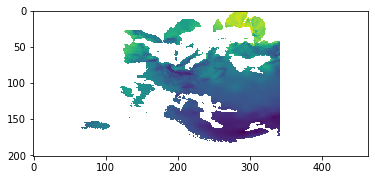

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(tmax)